In [483]:
import numpy as np
import pandas as pd
%matplotlib inline

In [484]:
data = pd.read_csv("./ML - Assignment 2/data_logistic_matplot.txt")
data.head(5)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


N:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0ECF6A278>,
      dtype=object)

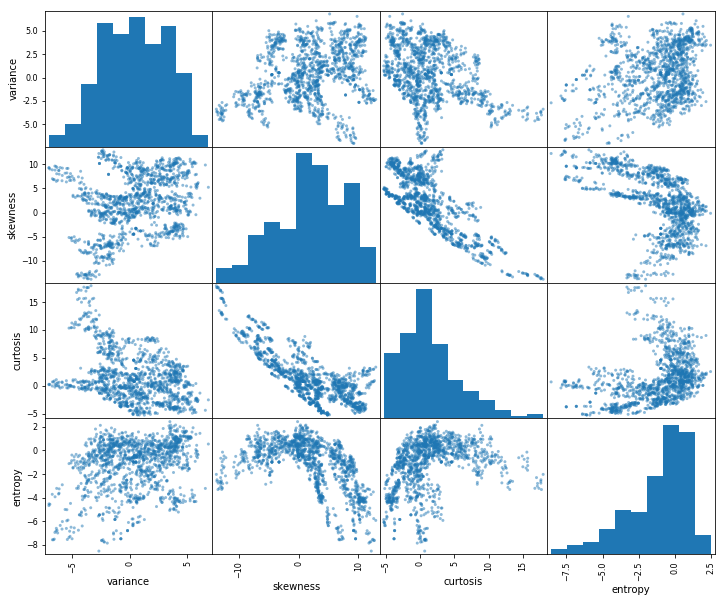

In [485]:
pd.scatter_matrix(data.loc[:,'variance':'entropy'], figsize = (12,10))

In [486]:
features = []
targets = []
with open("./ML - Assignment 2/data_logistic.txt", 'r') as f:
    for line in f:
        arr = []
        line_arr = line.split(',')
        for i in range(len(line_arr) - 1):
            arr.append(float(line_arr[i]))
        arr.insert(0,1)
        features.append(arr)
        targets.append(int(line_arr[len(line_arr)-1]))

In [487]:
print(len(features))
print(len(targets))

1372
1372


In [488]:
# print the first 10 training examples
for i in range(10):
    print(f'TARGET:{targets[i]}  FEATURES:{features[i]}  ')

TARGET:0  FEATURES:[1, 3.6216, 8.6661, -2.8073, -0.44699]  
TARGET:0  FEATURES:[1, 4.5459, 8.1674, -2.4586, -1.4621]  
TARGET:0  FEATURES:[1, 3.866, -2.6383, 1.9242, 0.10645]  
TARGET:0  FEATURES:[1, 3.4566, 9.5228, -4.0112, -3.5944]  
TARGET:0  FEATURES:[1, 0.32924, -4.4552, 4.5718, -0.9888]  
TARGET:0  FEATURES:[1, 4.3684, 9.6718, -3.9606, -3.1625]  
TARGET:0  FEATURES:[1, 3.5912, 3.0129, 0.72888, 0.56421]  
TARGET:0  FEATURES:[1, 2.0922, -6.81, 8.4636, -0.60216]  
TARGET:0  FEATURES:[1, 3.2032, 5.7588, -0.75345, -0.61251]  
TARGET:0  FEATURES:[1, 1.5356, 9.1772, -2.2718, -0.73535]  


In [489]:
print(features[:2])
print()
print(features[0])

[[1, 3.6216, 8.6661, -2.8073, -0.44699], [1, 4.5459, 8.1674, -2.4586, -1.4621]]

[1, 3.6216, 8.6661, -2.8073, -0.44699]


In [490]:
X = np.array(features)

In [491]:
y = np.array(targets)

In [492]:
def normalize(X):
    X = X.T
    
    max_num = np.max(X, axis=1)
    min_num = np.min(X, axis=1)
    range_num = max_num - min_num
    # print(max_num)
    # print(min_num)
    # print(range_num)
    
    for i in range(len(X)):
        if i == 0:
            continue
        X[i] = X[i] - min_num[i]
        X[i] /= range_num[i]
    
    return X.T

In [493]:
X = normalize(X)

In [494]:
print(X.shape)
print(X)

(1372, 5)
[[1.         0.76900389 0.83964273 0.10678269 0.73662766]
 [1.         0.83565902 0.82098209 0.12180412 0.64432563]
 [1.         0.78662859 0.41664827 0.31060805 0.78695091]
 ...
 [1.         0.23738543 0.01176814 0.98560321 0.52475518]
 [1.         0.25084193 0.20170105 0.76158701 0.6606745 ]
 [1.         0.32452819 0.49074676 0.34334762 0.88594888]]


In [495]:
print(X.shape)
print(y.shape)

(1372, 5)
(1372,)


In [496]:
print(X.shape[0])
print(X.shape[1])

1372
5


In [497]:
y = np.reshape(y,(y.shape[0],1))

In [498]:
print(X.shape)  # 1372*5
print(y.shape)  # 1372*1

(1372, 5)
(1372, 1)


In [499]:
print(y)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [500]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

In [501]:
'''
features: 1372*5
weights : 5*1
'''
def predictions(features, weights):
    '''
    returns 1D array of probabilities
    that the class is 1
    '''
    return sigmoid(np.dot(features, weights)) #this is a vector 1372*1

In [502]:
def cost_function(predictions, targets):
    cost_class1 = - targets*np.log(predictions)
    cost_class2 = - (1-targets)*np.log(1-predictions)
    cost = cost_class1 + cost_class2
    total_cost = cost.sum() / len(targets)
    return total_cost

In [503]:
'''
updated cost function for the regularised logistic regression
'''

def reg_cost_function(predictions, targets, weights, lambda_val = 1):
    cost_class1 = - targets * (np.log(predictions))
    cost_class2 = - (1-targets)*np.log(1-predictions)
    cost = cost_class1 + cost_class2
    total_cost = cost.sum() / len(targets)
    
    weights = weights.flatten()
    weights = weights[1:]
    weights = np.square(weights)
    reg_cost = (weights.sum() * (lambda_val / (2 * len(targets))))
    reg_cost = total_cost + reg_cost
    return reg_cost 

In [504]:
'''
features: 1372*5
weights: 5*1
predictions: 1372*1
target: 1372*1

reshaped_features: 5*1372
error: 1372*1
error_value: 5*1
'''

def grad_descent(features, targets, weights, lr):
    predicted_values = predictions(features, weights)
    #reshape feature vector
    reshaped_features = features.T
    error = predicted_values - targets
    gradient = np.dot(reshaped_features, error)
    gradient = gradient / len(features)
    # multiply by learning rate
    gradient = gradient * lr 
    weights = weights - gradient 
    return weights

In [505]:
'''
updated gradient descent algorithm for the regularised
logistic regression

features: 1372*5
weights: 5*1
predictions: 1372*1
target: 1372*1

reshaped_features: 5*1372
error: 1372*1
error_value: 5*1
'''

def reg_grad_descent(features, targets, weights, lr, lambda_val = 1):
    predicted_values = predictions(features, weights)
    #reshape feature vector
    reshaped_features = features.T
    error = predicted_values - targets
    
    # print(f'features shape: {reshaped_features.shape}')
    # print()
    # print(weights)
    # print(f'weights: {weights.shape}')
    # print()
    # print(f'error: {error.shape}')
    
    
    reshaped_features_W0 = reshaped_features[0].reshape(1,-1)
    reshaped_features_new = reshaped_features[1:]
    
    
    # print(reshaped_features_W0.shape)
    # print(reshaped_features_W0)
    # print(reshaped_features_new.shape)
    # print(reshaped_features_new)
    
    
    gradient_W0 = np.dot(reshaped_features_W0, error)
    gradient_W0 = gradient_W0 / len(features)
    gradient_W0 = gradient_W0 * lr
    # print(f'gradient_W0.shape: {gradient_W0.shape}')
    # print(gradient_W0)
    
    gradient_W = np.dot(reshaped_features_new, error)
    gradient_W = gradient_W / len(features) 
    gradient_W = gradient_W - (weights[1:] * (lambda_val / len(targets)))
    gradient_W = gradient_W * lr 
    # print(f'gradient_W.shape: {gradient_W.shape}')
    # print(gradient_W)
    
    gradient = np.vstack((gradient_W0,gradient_W))
    # print(gradient)
    # print(gradient.shape)
    
    weights = weights - gradient 
    return weights

In [506]:
'''
JUST FOR TESTING
'''
reg_grad_descent(X,y,np.array([[1],[1],[1],[1],[1]]),0.01)

array([[0.99490234],
       [0.9964986 ],
       [0.99652673],
       [0.99868308],
       [0.99655773]])

In [507]:
'''
JUST FOR TESTING
'''
grad_descent(X,y,np.array([[1],[1],[1],[1],[1]]),0.01)

array([[0.99490234],
       [0.99649131],
       [0.99651945],
       [0.99867579],
       [0.99655044]])

In [550]:
'''
non regularised training
'''
def train(features, targets, weights, lr, iters):
    
    for i in range(iters):
        weights = grad_descent(features, targets, weights, lr)
        predicted_values = predictions(features, weights)
        cost = cost_function(predicted_values, targets)
        # print cost value every 1000 iteration
        if i % 1000 == 0:
            print("iter: "+str(i) + " cost: "+str(cost))

    return weights


'''
regularised training
'''
def reg_train(features, targets, weights, lr, iters, lambda_val = 1):
    
    for i in range(iters):
        weights = reg_grad_descent(features, targets, weights, lr, lambda_val)
        predicted_values = predictions(features, weights)
        cost = reg_cost_function(predicted_values, targets, weights, lambda_val)
        # print cost value every 1000 iteration
        if i % 1000 == 0:
            print("iter: "+str(i) + " cost: "+str(cost))

    return weights

In [587]:
'''
weight vector after training(non-regularised)
'''
weights = train(X,y,np.array([[0],[0],[0],[0],[0]]),0.1,25000)

iter: 0 cost: 0.6909983902851077
iter: 1000 cost: 0.43321575834280496
iter: 2000 cost: 0.35238443064809716
iter: 3000 cost: 0.30410636605144475
iter: 4000 cost: 0.27002646382136036
iter: 5000 cost: 0.24409488399486887
iter: 6000 cost: 0.22351047196354623
iter: 7000 cost: 0.2067065371413611
iter: 8000 cost: 0.19270332414743532
iter: 9000 cost: 0.18084375023350083
iter: 10000 cost: 0.17066582783673095
iter: 11000 cost: 0.16183336481449534
iter: 12000 cost: 0.15409508279382564
iter: 13000 cost: 0.14725903847547964
iter: 14000 cost: 0.1411759064494937
iter: 15000 cost: 0.13572767735787658
iter: 16000 cost: 0.13081980439549362
iter: 17000 cost: 0.12637561853029253
iter: 18000 cost: 0.12233227712239785
iter: 19000 cost: 0.11863777300558026
iter: 20000 cost: 0.11524869178460338
iter: 21000 cost: 0.11212850649651264
iter: 22000 cost: 0.10924626440180543
iter: 23000 cost: 0.10657556407938445
iter: 24000 cost: 0.10409375027943668


In [588]:
'''weight vector after training(regularised)'''
reg_weights = reg_train(X,y,np.array([[0],[0],[0],[0],[0]]),0.1,25000,1)

iter: 0 cost: 0.6909984590244842
iter: 1000 cost: 0.4363307118986088
iter: 2000 cost: 0.36172864820393813
iter: 3000 cost: 0.3212227050119429
iter: 4000 cost: 0.2963721376027955
iter: 5000 cost: 0.28122631929920794
iter: 6000 cost: 0.27311083528304153
iter: 7000 cost: 0.27059563427641065
iter: 8000 cost: 0.2728532597520643
iter: 9000 cost: 0.279402558214024
iter: 10000 cost: 0.2899877930257965
iter: 11000 cost: 0.30451479483191923
iter: 12000 cost: 0.323014904775088
iter: 13000 cost: 0.3456241741761293
iter: 14000 cost: 0.372571826783184
iter: 15000 cost: 0.40417487376456895
iter: 16000 cost: 0.4408371774492148
iter: 17000 cost: 0.48305200684191146
iter: 18000 cost: 0.5314075564898009
iter: 19000 cost: 0.5865951647852747
iter: 20000 cost: 0.6494201441328331
iter: 21000 cost: 0.7208152635507465
iter: 22000 cost: 0.8018570262291156
iter: 23000 cost: 0.8937849718796925
iter: 24000 cost: 0.9980243104679134


In [589]:
'''
Non Regularized weights
'''
print(weights)

[[ 15.87399419]
 [-15.87137283]
 [-10.5633841 ]
 [-12.32501031]
 [  2.60353885]]


In [590]:
'''
Regularized weights
'''
print(reg_weights)

[[ 26.80396557]
 [-37.78533803]
 [-17.09742363]
 [-28.76951859]
 [ 15.44038417]]


In [591]:
reg_predicted_labels = predictions(X,reg_weights)
print(reg_predicted_labels[:5])
print(type(reg_predicted_labels))

[[2.46696194e-04]
 [4.26961753e-06]
 [1.08196559e-03]
 [1.19783904e-05]
 [2.99994959e-01]]
<class 'numpy.ndarray'>


In [592]:
predicted_labels = predictions(X,weights)
print(predicted_labels[:5])
print(type(predicted_labels))

[[0.00996283]
 [0.0027728 ]
 [0.05778592]
 [0.00773253]
 [0.57680472]]
<class 'numpy.ndarray'>


In [593]:
def classify(predictions):
    print(type(predictions))
    classify_pred = []
    np.array(classify_pred)
    print(len(predictions))
    for i in range(len(predictions)):
        if (predictions[i] >= 0.5):
            classify_pred.append(1)
        else:
            classify_pred.append(0)
    return classify_pred

In [594]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1 - (float(np.count_nonzero(diff)) / len(diff))

In [595]:
labels = classify(predicted_labels)
labels = np.reshape(labels, (1372,1))

reg_labels = classify(reg_predicted_labels)
reg_labels = np.reshape(reg_labels, (1372,1))

<class 'numpy.ndarray'>
1372
<class 'numpy.ndarray'>
1372


In [596]:
print(labels[:5])
print(labels.shape)
print(y[:5])
print(y.shape)

[[0]
 [0]
 [0]
 [0]
 [1]]
(1372, 1)
[[0]
 [0]
 [0]
 [0]
 [0]]
(1372, 1)


In [597]:
accuracy(labels, y)

0.9730320699708455

In [598]:
accuracy(reg_labels, y)

0.9577259475218659